# Neural Network: Galaxy vs Quasar classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV


from astropy.io import ascii
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12

In [2]:
#Ascii.read automatically exludes NaNs!
data = ascii.read('../solutions/galaxyquasar.csv', header_start=0)

In [3]:
data

u,g,r,i,z,class,z1,zerr
float64,float64,float64,float64,float64,str6,float64,float64
18.97213,18.53676,18.5828,18.34936,18.29215,QSO,0.5228189,0.0001547483
19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.1228459,2.816076e-05
19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.0,0.0
19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.1474355,9.310701e-06
19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.0006307968
17.60994,15.90911,15.0209,14.54955,14.19971,GALAXY,0.04619161,1.022329e-05
18.50014,17.42286,17.03657,16.76236,16.63258,GALAXY,0.0516851,6.667251e-06
19.53253,19.49823,19.42254,19.07912,18.90426,QSO,1.88844,0.0005242734
19.37014,17.94086,17.154,16.74367,16.42825,GALAXY,0.137445,1.284492e-05


In [4]:
u_g = (data['u'] - data['g'])[:, None]
g_r = (data['g'] - data['r'])[:, None]
r_i = (data['r'] - data['i'])[:, None]
i_z = (data['i'] - data['z'])[:, None]

#Initializing fitting dataset
tofit = np.column_stack([u_g, g_r, r_i, i_z])

#Quasar = 1, Galaxy = 0
label = np.where(data['class'] == 'QSO', 1, 0)

In [5]:
#Data Preprocessing

#Centering fitting data in [-1, 1] -> Easier for the Neural Network to work with!
sc = StandardScaler()
tofit = sc.fit_transform(tofit)

#30% train/test split
size = 0.3

#Splicing into training and test subsets
xtest, xtrain, ytest, ytrain = train_test_split(tofit, label, test_size=size)

In [6]:
#Initializing NN
clf = MLPClassifier(
    hidden_layer_sizes=(5),
    activation = 'relu',
    solver = 'adam',
    learning_rate_init = 0.001,
    max_iter = 200,
    shuffle = True)

In [7]:
#Fitting the NN
clf.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=5)

In [8]:
#Predicting
ypred = clf.predict_proba(xtest)[:, 1]      #Probability
ysamples = clf.predict(xtest)               #Samples

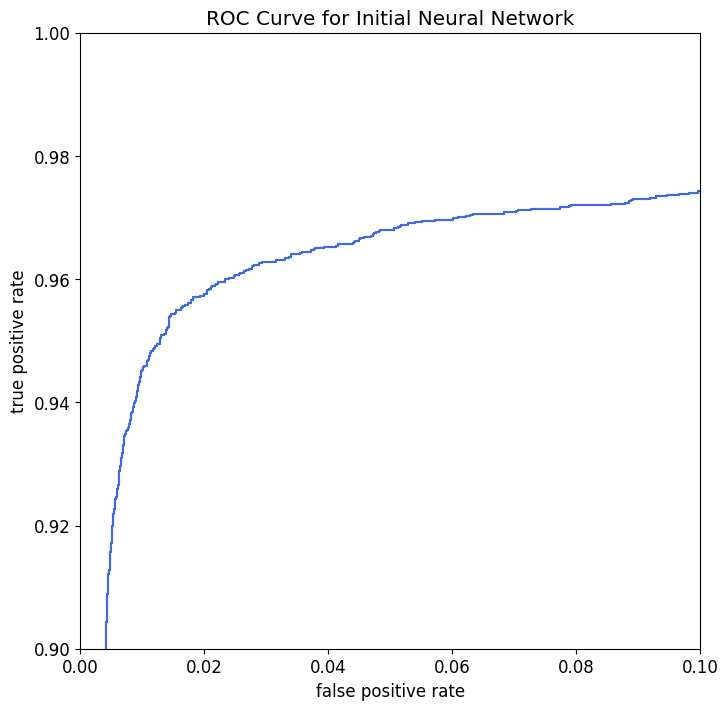

In [27]:
#ROC Curves
fpr, tpr, thresh = roc_curve(ytest, ypred)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Initial Neural Network')
plt.plot(fpr, tpr, c='royalblue')
plt.xlim(0, 0.1)
plt.xlabel('false positive rate')
plt.ylim(0.9, 1)
plt.ylabel('true positive rate')
plt.show()

In [10]:
#Cross Validation on activation function, hidden layers and learning rate -> Optimizing Hyperparameters!

#Activation Functions
act_funcs = ['identity', 'logistic', 'tanh', 'relu']

#‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

#‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

#‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

#‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

mlp_params = {'activation': act_funcs, 'hidden_layer_sizes' : np.arange(5, 15), 'learning_rate_init' : np.linspace(0.001, 0.01, 10)}

test_nn = MLPClassifier(
    solver = 'adam',
    max_iter = 200,
    shuffle = True)

best = GridSearchCV(test_nn, param_grid=mlp_params, cv=5, scoring='accuracy', n_jobs=-1)
best.fit(xtrain[:2000], ytrain[:2000]);

/Users/oliverbenjaminrossi/Visual Studio/Università/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oliverbenjaminrossi/Visual Studio/Università/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oliverbenjaminrossi/Visual Studio/Università/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oliverbenjaminrossi/Visual Studio/Università/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

In [11]:
#Fetching Best Parameters
layers = best.best_params_['hidden_layer_sizes']
activation = best.best_params_['activation']
rate = best.best_params_['learning_rate_init']
print('Best Hyper-Parameters for Multi Layer Perceptron are:\n', best.best_params_)

Best Hyper-Parameters for Multi Layer Perceptron are:
 {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.009000000000000001}


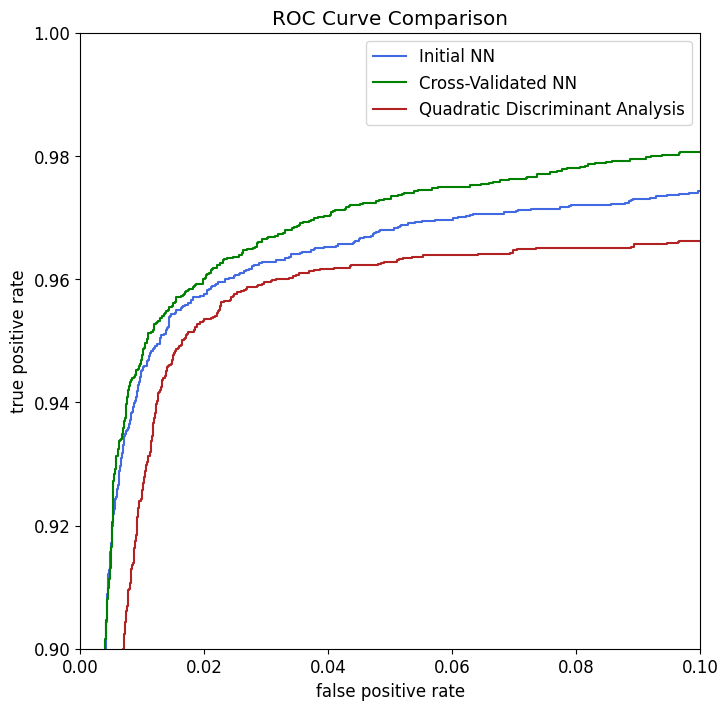

In [13]:
#Initializing optimized MLP
final_MLP = MLPClassifier(
    hidden_layer_sizes = layers,
    activation = activation,
    learning_rate_init = rate,
        solver = 'adam',
    max_iter = 200,
    shuffle = True)

final_MLP.fit(xtrain, ytrain)
ypred1 = final_MLP.predict_proba(xtest)[:, 1]
ysamples1 = final_MLP.predict(xtest)

#Comparison to 'Standard Classifier' Quadratic Discriminant Analysis
benchmark_clf = QDA()
benchmark_clf.fit(xtrain, ytrain)
ypred2 = benchmark_clf.predict_proba(xtest)[:, 1]
ysamples2 = benchmark_clf.predict(xtest)

#Building remaining ROC Curves
fpr1, tpr1, thresh1 = roc_curve(ytest, ypred1)
fpr2, tpr2, thresh2 = roc_curve(ytest, ypred2)

plt.plot(fpr, tpr, c='royalblue', label='Initial NN')
plt.plot(fpr1, tpr1, c='green', label='Cross-Validated NN')
plt.plot(fpr2, tpr2, c='firebrick', label='Quadratic Discriminant Analysis')
plt.title('ROC Curve Comparison')
plt.xlim(0, 0.1)
plt.xlabel('false positive rate')
plt.ylim(0.9, 1)
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [23]:
result = np.column_stack([ysamples, ysamples1, ysamples2])
result.shape

(35000, 3)

In [24]:
clfs = ['Initial Neural Network', 'Cross-Validated Neural Network', 'Quadratic Discriminant Analysis']

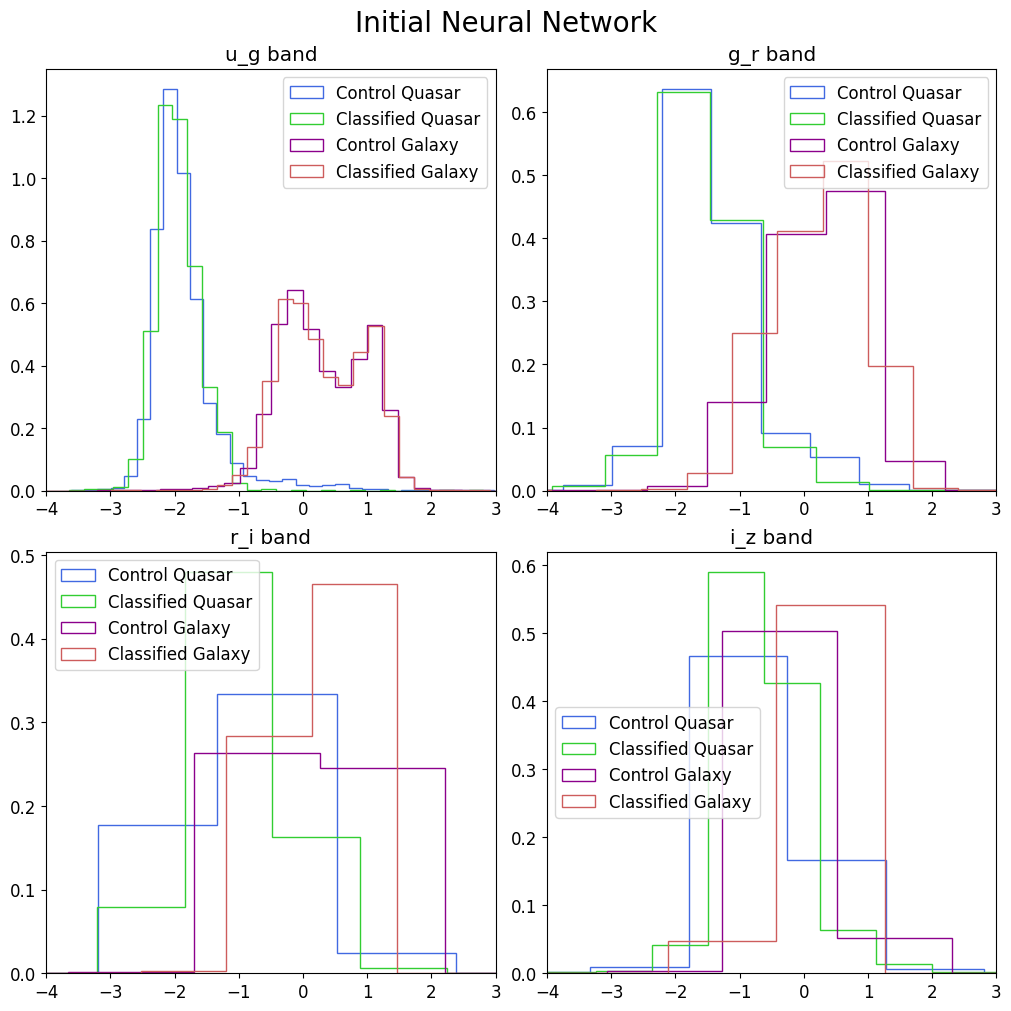

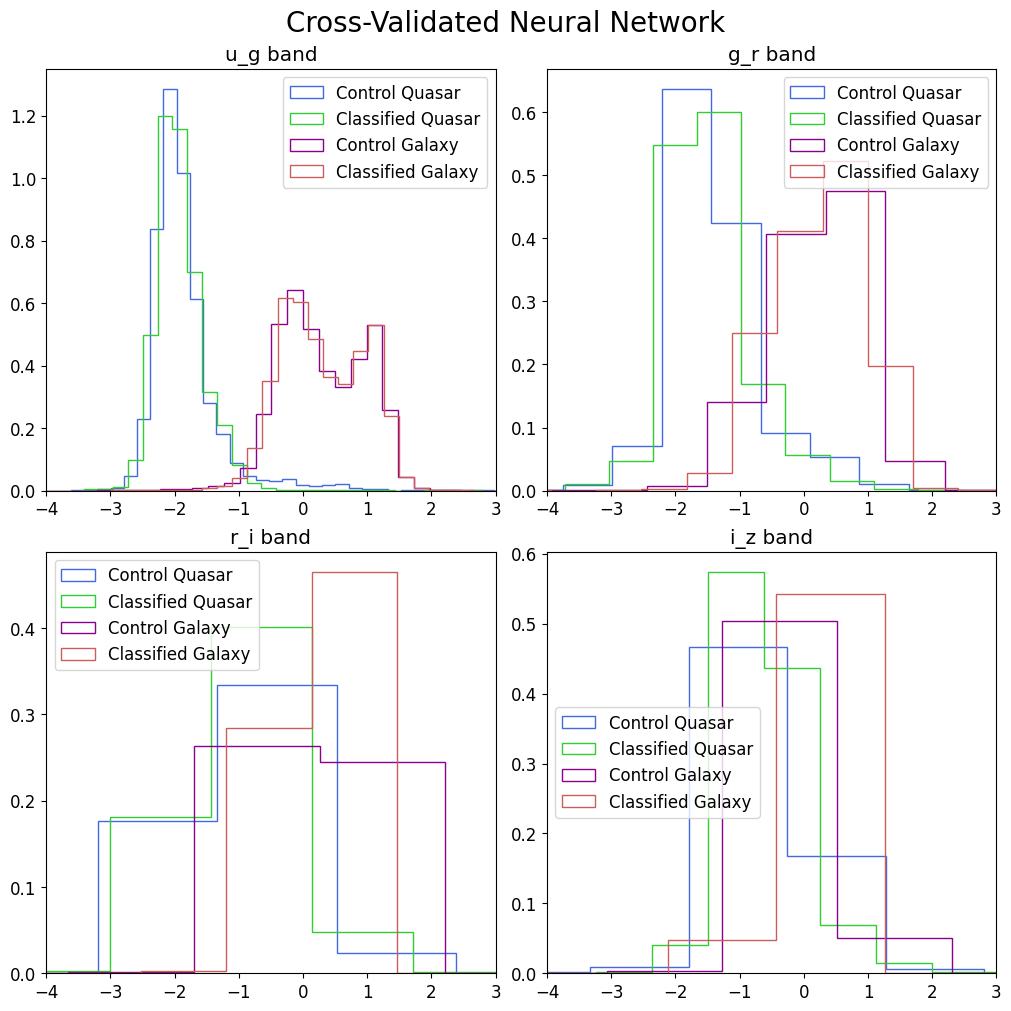

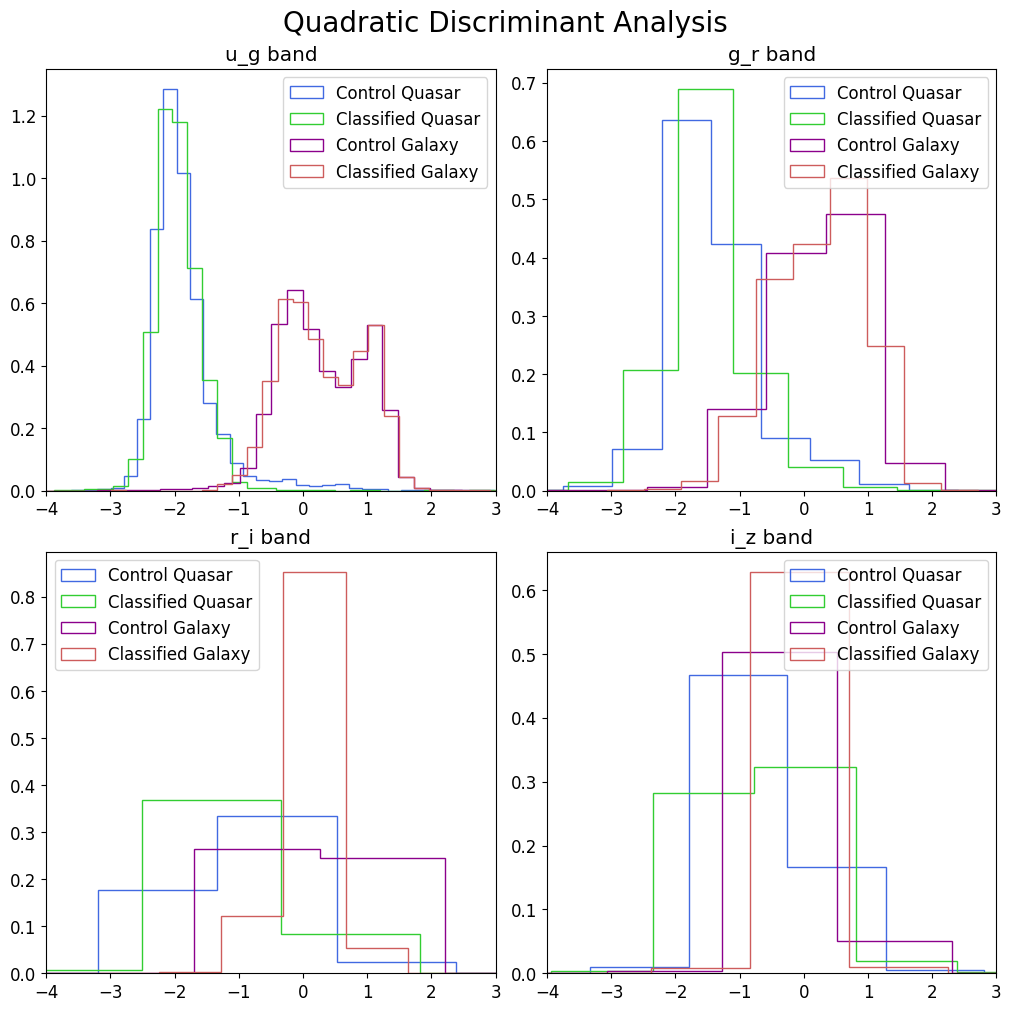

In [26]:
#Plotting
for i in range(len(clfs)):

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    fig.suptitle(clfs[i], fontsize=20)

    #Image Building

    #Top Left
    axs[0, 0].set_title('u_g band')
    axs[0, 0].hist(tofit[:, 0][label == 1], bins=50, density=True, label='Control Quasar', color='royalblue', histtype='step')
    axs[0, 0].hist(xtest[:, 0][result[:, i] == 1], bins=50, density=True, label='Classified Quasar', color='limegreen', histtype='step')
    axs[0, 0].hist(tofit[:, 0][label == 0], bins=50, density=True, label='Control Galaxy', color='darkmagenta', histtype='step')
    axs[0, 0].hist(xtest[:, 0][result[:, i] == 0], bins=50, density=True, label='Classified Galaxy', color='indianred', histtype='step')
    axs[0, 0].set_xlim(-4, 3)
    axs[0, 0].legend()

    #Top Right
    axs[0, 1].set_title('g_r band')
    axs[0, 1].hist(tofit[:, 1][label == 1], bins=50, density=True, label='Control Quasar', color='royalblue', histtype='step')
    axs[0, 1].hist(xtest[:, 1][result[:, i] == 1], bins=50, density=True, label='Classified Quasar', color='limegreen', histtype='step')
    axs[0, 1].hist(tofit[:, 1][label == 0], bins=50, density=True, label='Control Galaxy', color='darkmagenta', histtype='step')
    axs[0, 1].hist(xtest[:, 1][result[:, i] == 0], bins=50, density=True, label='Classified Galaxy', color='indianred', histtype='step')
    axs[0, 1].set_xlim(-4, 3)
    axs[0, 1].legend()

    #Bottom Left
    axs[1, 0].set_title('r_i band')
    axs[1, 0].hist(tofit[:, 2][label == 1], bins=50, density=True, label='Control Quasar', color='royalblue', histtype='step')
    axs[1, 0].hist(xtest[:, 2][result[:, i] == 1], bins=50, density=True, label='Classified Quasar', color='limegreen', histtype='step')
    axs[1, 0].hist(tofit[:, 2][label == 0], bins=50, density=True, label='Control Galaxy', color='darkmagenta', histtype='step')
    axs[1, 0].hist(xtest[:, 2][result[:, i] == 0], bins=50, density=True, label='Classified Galaxy', color='indianred', histtype='step')
    axs[1, 0].set_xlim(-4, 3)
    axs[1, 0].legend()

    #Bottom Right
    axs[1, 1].set_title('i_z band')
    axs[1, 1].hist(tofit[:, 3][label == 1], bins=50, density=True, label='Control Quasar', color='royalblue', histtype='step')
    axs[1, 1].hist(xtest[:, 3][result[:, i] == 1], bins=50, density=True, label='Classified Quasar', color='limegreen', histtype='step')
    axs[1, 1].hist(tofit[:, 3][label == 0], bins=50, density=True, label='Control Galaxy', color='darkmagenta', histtype='step')
    axs[1, 1].hist(xtest[:, 3][result[:, i] == 0], bins=50, density=True, label='Classified Galaxy', color='indianred', histtype='step')
    axs[1, 1].set_xlim(-4, 3)
    axs[1, 1].legend()

    plt.show()